# Experiment 13

#### Problem Statement:
Python program to implement Credit Card Fraud detection using Support Vector Machine classification.

URL for the dataset:
https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud


#### Install Dependencies:

In [16]:
! pip install tabulate

#### Code:

In [17]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snss

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [18]:
# importing the dataset
dataset = pd.read_csv('card_transdata_dataset.csv')
print(dataset.head().to_markdown())

|    |   distance_from_home |   distance_from_last_transaction |   ratio_to_median_purchase_price |   repeat_retailer |   used_chip |   used_pin_number |   online_order |   fraud |
|---:|---------------------:|---------------------------------:|---------------------------------:|------------------:|------------:|------------------:|---------------:|--------:|
|  0 |             57.8779  |                         0.31114  |                         1.94594  |                 1 |           1 |                 0 |              0 |       0 |
|  1 |             10.8299  |                         0.175592 |                         1.29422  |                 1 |           0 |                 0 |              0 |       0 |
|  2 |              5.09108 |                         0.805153 |                         0.427715 |                 1 |           0 |                 0 |              1 |       0 |
|  3 |              2.24756 |                         5.60004  |                         0.3626

In [19]:
# checking for null values
print("\nChecking for null values:")
print(dataset.isnull().sum())

# dropping null values

dataset = dataset.dropna()
print(dataset.isnull().sum)


Checking for null values:
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64
<bound method NDFrame._add_numeric_operations.<locals>.sum of         distance_from_home  distance_from_last_transaction  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   
...                    ...                             ...   
999995               False                           False   
999996               False                           False   
999997               False                          

In [20]:
# checking for duplicate values
print("\nChecking for duplicate values:")
print(dataset.duplicated().sum())


Checking for duplicate values:


0


In [21]:
# checking for outliers
print("\nChecking for outliers:")
print(dataset.describe())


Checking for outliers:
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000  

In [22]:
# checking the number of fraud and non-fraud transactions
print("\nNumber of fraud and non-fraud transactions:")
print(dataset['fraud'].value_counts())



Number of fraud and non-fraud transactions:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [23]:
# visualizing the number of fraud and non-fraud transactions
fraud_data = dataset[dataset['fraud'] == 1]
non_fraud_data = dataset[dataset['fraud'] == 0]

# calculating the minimum number of fraud or non-fraud transactions
min_instances = min(len(fraud_data), len(non_fraud_data))

In [24]:
# creating a subset of the data with equal number of fraud and non-fraud transactions
fraud_subset = fraud_data.sample(n=20000, random_state=42)
non_fraud_subset = non_fraud_data.sample(n=20000, random_state=42)

In [25]:
# concatenating the fraud and non-fraud subsets
small_dataset = pd.concat([fraud_subset, non_fraud_subset])

In [26]:
# scaling the dataset
sc = StandardScaler()
sc.fit(small_dataset.drop('fraud', axis=1))

StandardScaler()

In [27]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(small_dataset.drop(
    'fraud', axis=1), small_dataset['fraud'], test_size=0.2, random_state=42)

In [28]:
# training the model using svm and changing the kernel to poly
classifier = SVC(kernel='linear', random_state=0)
# classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
# predicting the test set results
y_pred = classifier.predict(X_test)


Confusion Matrix:
[[3694  292]
 [ 134 3880]]

Confusion Matrix Display:

Accuracy Score:
0.94675

Precision Score:
0.9300095877277086

Recall Score:
0.966616841056303

F1 Score:
0.9479599315905204

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      3986
         1.0       0.93      0.97      0.95      4014

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



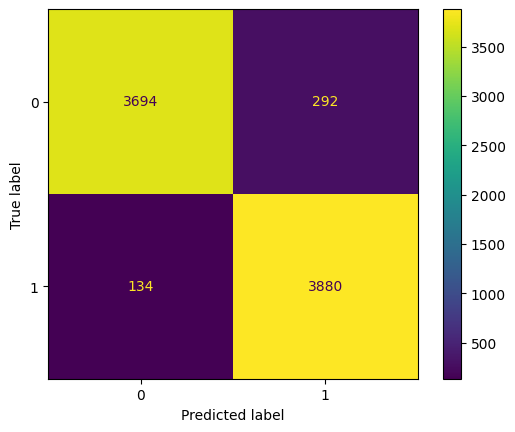

In [30]:
# calculating the metrics
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nConfusion Matrix Display:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nPrecision Score:")
print(precision_score(y_test, y_pred))

print("\nRecall Score:")
print(recall_score(y_test, y_pred))

print("\nF1 Score:")
print(f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))